In [35]:
import pandas as pd

Dataset from kaggle

In [36]:
dataset = pd.read_csv("used_car_price_dataset_extended.csv")

Check out dataset

In [77]:
dataset["id"] = dataset.index + 1
dataset.head(5)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,id
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No,1
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes,2
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes,3
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes,4
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes,5


In [38]:
target_column = "price_usd"

In [39]:
dataset[target_column].value_counts()

price_usd
1000.00     51
4136.87      2
6563.44      2
3688.31      2
4203.31      2
            ..
9684.58      1
8432.62      1
10809.07     1
8490.93      1
11634.09     1
Name: count, Length: 9906, dtype: int64

In [40]:
dataset.shape[0]

10000

In [41]:
dataset.shape[1]

12

Thus the dataset has 10000 rows and 12 columns

How many brands are there?

In [42]:
dataset["brand"].value_counts()

brand
Nissan        1089
Volkswagen    1033
BMW           1021
Tesla         1006
Honda         1003
Chevrolet      999
Hyundai        989
Toyota         956
Kia            955
Ford           949
Name: count, dtype: int64

Now lets do some plotting to get some intuition about the data

In [43]:
import seaborn as sns

<Axes: xlabel='engine_cc', ylabel='price_usd'>

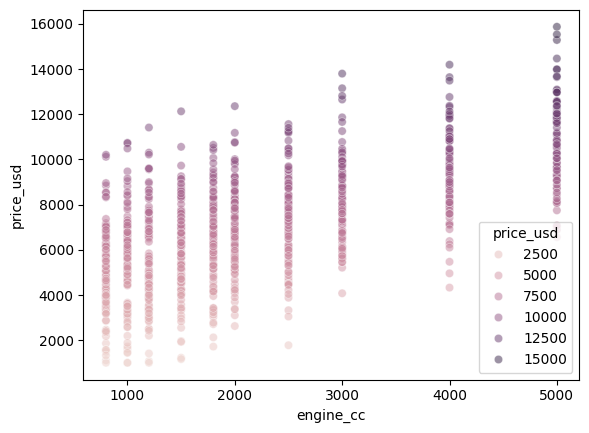

In [45]:
n_samples_to_plot = 1000
columns = ["engine_cc", "make_year", "accidents_reported"]
sns.scatterplot(
    x="engine_cc",
    y="price_usd",
    data=dataset[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)



We can thus see that price generally trends upwards the more cc the engine has 

Let's try again with makeyear

<Axes: xlabel='make_year', ylabel='price_usd'>

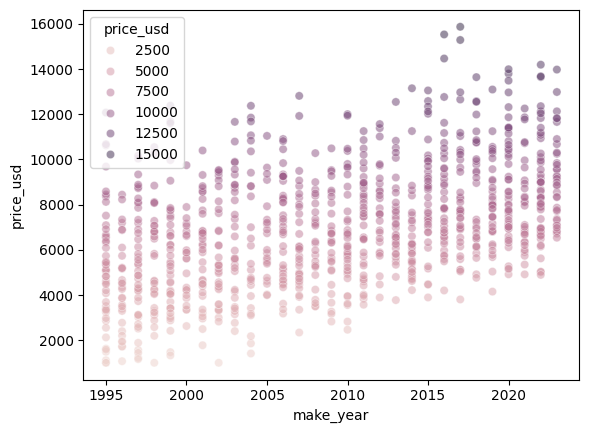

In [47]:
sns.scatterplot(
    x="make_year",
    y="price_usd",
    data=dataset[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)



Here we can also observe a general upwards trends the newer the car is

Let's check out if brand impacts price as well:

<Axes: xlabel='brand', ylabel='price_usd'>

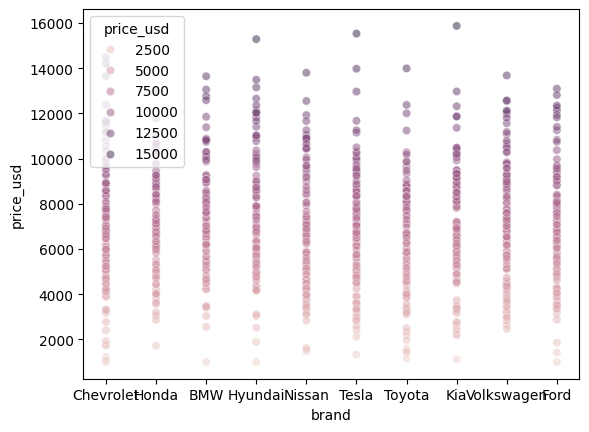

In [93]:
sns.scatterplot(
    x="brand",
    y="price_usd",
    data=dataset[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)



Here we can see skews in relation to their distributions, where some fall towards the higher price ranges (BMW), while Toyota fall towards the lower price ranges

<Axes: xlabel='mileage_kmpl', ylabel='price_usd'>

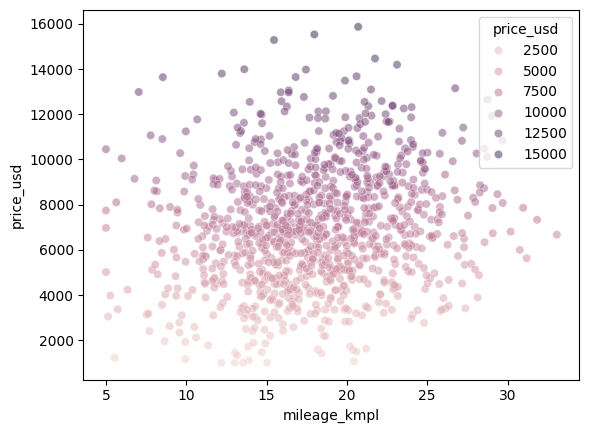

In [94]:
sns.scatterplot(
    x="mileage_kmpl",
    y="price_usd",
    data=dataset[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)


# Doing some machine learning

In [51]:
#Separating target from features
target = dataset[target_column]
data = dataset.drop(columns=[target_column])

In [52]:
data.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

In [53]:
target

0        8587.64
1        5943.50
2        9273.58
3        6836.24
4        4625.79
          ...   
9995     5498.71
9996     9588.31
9997     4557.10
9998     7413.59
9999    11634.09
Name: price_usd, Length: 10000, dtype: float64

In [55]:
# Understand the datatypes of the dataset
data.dtypes

make_year               int64
mileage_kmpl          float64
engine_cc               int64
fuel_type              object
owner_count             int64
brand                  object
transmission           object
color                  object
service_history        object
accidents_reported      int64
insurance_valid        object
dtype: object

In [58]:
numerical_columns = ["make_year", "mileage_kmpl", "engine_cc", "owner_count", "accidents_reported"]

In [59]:
data_numeric = data[numerical_columns]

In [60]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.25
)


In [61]:
print(
    f"Number of samples in testing: {data_test.shape[0]} => "
    f"{data_test.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
    " original set"
)


Number of samples in testing: 2500 => 25.0% of the original set


In [62]:
print(
    f"Number of samples in training: {data_train.shape[0]} => "
    f"{data_train.shape[0] / data_numeric.shape[0] * 100:.1f}% of the"
    " original set"
)


Number of samples in training: 7500 => 75.0% of the original set


In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [64]:
model.fit(data_train, target_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
accuracy = model.score(data_test, target_test)
print(f"Accuracy of linear regression: {accuracy:.3f}")

Accuracy of linear regression: 0.777


In [69]:
preds_test=model.predict(data_test)

In [90]:
submission = pd.DataFrame({'Idtest':data_test.index, 'Id_pred':target_test.index, 'PredictedSalePrice':preds_test, 'ActualPrice':target_test})
submission.to_csv('submission.csv',index=False)

In [91]:
readsubmission = pd.read_csv("submission.csv")

In [92]:
readsubmission.head(5)

,Idtest,Id_pred,PredictedSalePrice,ActualPrice
0,6252,6252,12366.933430,12772.12
1,4684,4684,4999.867953,6177.69
2,1731,1731,7465.785722,6850.02
3,4742,4742,3911.658028,3373.18
4,4521,4521,8286.249559,7314.85
